In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition

In [3]:
class PCA:
    def calc_conv(self, X):
        m = X.shape[0]
        X = (X - np.mean(X, axis=0)) / np.var(X, axis=0)
        return np.dot(X.T, X) / m
    
    def pca(self, X, n_components):
        conv_matrix = self.calc_conv(X)
        eigenvalues, eigenvectors = np.linalg.eig(conv_matrix)
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:,idx]
        eigenvectors = eigenvectors[:, :n_components]

        return np.matmul(X, eigenvectors)

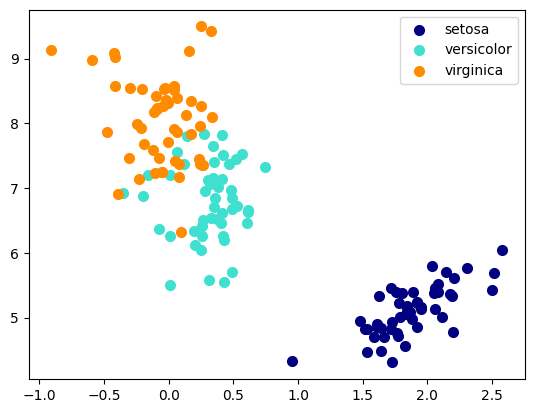

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_trans = PCA().pca(X, 2)

colors = ['navy', 'turquoise', 'darkorange']

for c, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], c=c, label=target_name, lw=2)

plt.legend()
plt.show()

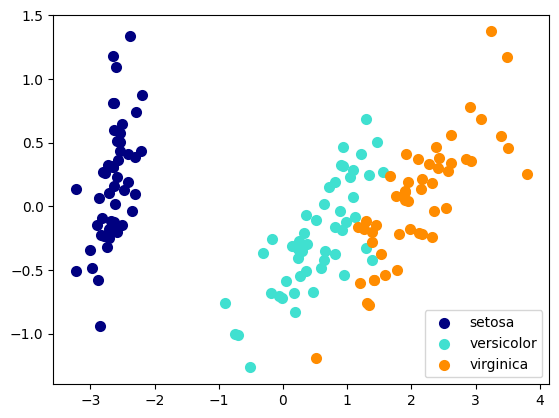

In [6]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)

X_trans = pca.transform(X)

colors = ['navy', 'turquoise', 'darkorange']
for c, i, target_name in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X_trans[y == i, 0], X_trans[y == i, 1], color=c, lw=2, label=target_name)

plt.legend()
plt.show()